## Predict Income

Predict the average income of a person given his city, region, and country.

In [1]:
%matplotlib inline

import seaborn
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

seaborn.set()

### Load dataset

In [2]:
df_test = pd.read_csv('data/test.csv')
df_train = pd.read_csv('data/train.csv')

### Inspecting dataset

In [3]:
df_train.head()

,ID,CountryID,RegionID,CityID,Income
0,1,1,1,1,29164.452066
1,5,1,1,4,17320.689679
2,6,1,1,5,32644.998689
3,7,1,1,6,37896.033024
4,8,1,1,6,18094.582239


In [4]:
del df_train['ID']
del df_test['ID']

In [5]:
df_train.columns

Index(['CountryID', 'RegionID', 'CityID', 'Income'], dtype='object')

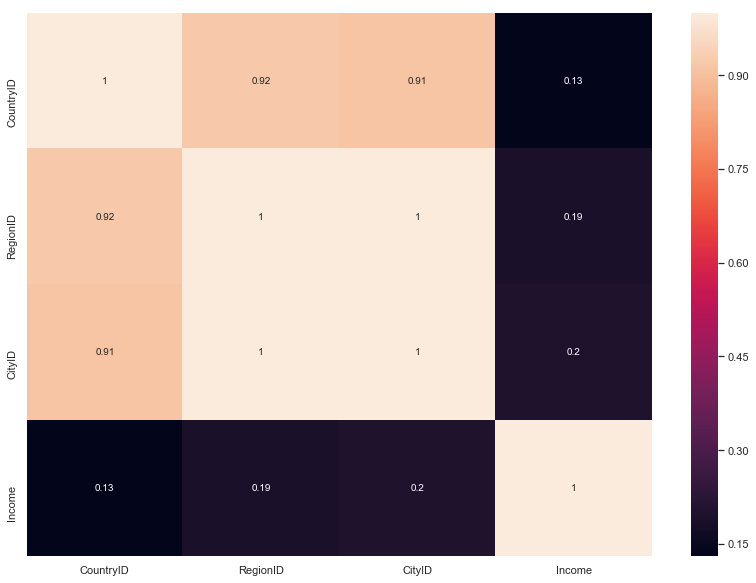

In [6]:
plt.figure(figsize=(14, 10))
seaborn.heatmap(df_train.corr().round(2), annot=True);

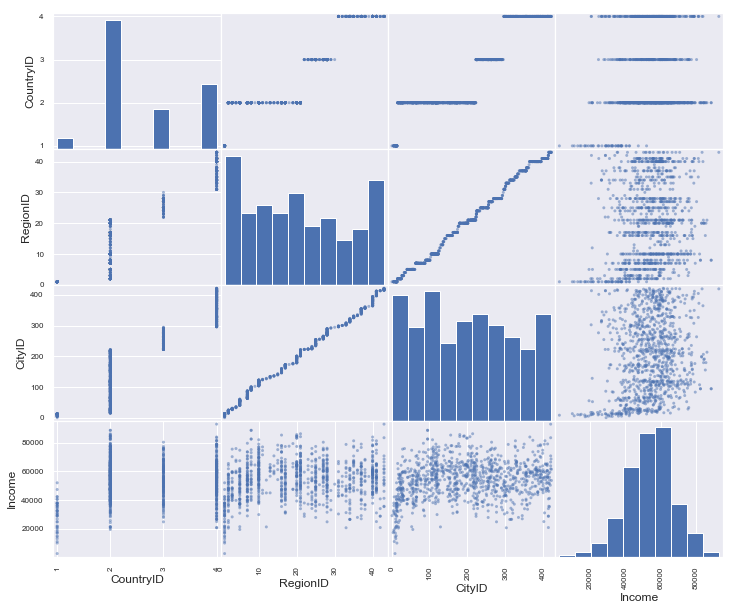

In [7]:
hist_kwds = {}
pd.plotting.scatter_matrix(df_train, hist_kwds=hist_kwds, figsize=(12, 10));

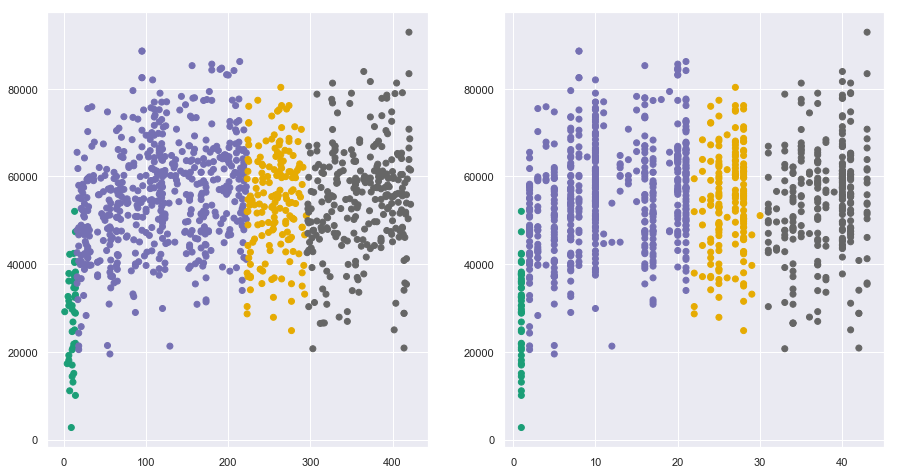

In [8]:
plt.figure(figsize=(15, 8))

plt.subplot(121)
plt.scatter(df_train['CityID'], df_train['Income'], c=df_train['CountryID'], cmap='Dark2');

plt.subplot(122)
plt.scatter(df_train['RegionID'], df_train['Income'], c=df_train['CountryID'], cmap='Dark2');

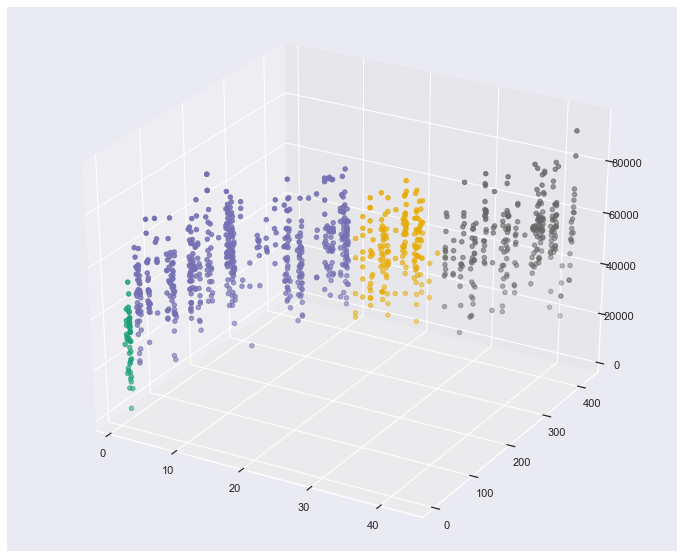

In [9]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(figsize=(12, 10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(df_train['RegionID'], df_train['CityID'], df_train['Income'], c=df_train['CountryID'], cmap='Dark2');

### Prepare data

In [10]:
X_train = df_train.values[:, :-1]
y_train = df_train.values[:, -1]
X_test = df_test.values[:, :-1]
y_test = df_test.values[:, -1]

np.all(np.c_[X_train, y_train] == df_train.values)

True

### Build &amp; Train &amp; Test model

In [11]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error

model = GradientBoostingRegressor(n_estimators=130, alpha=0.01, random_state=0)

In [12]:
model.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.01, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=3, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=130, n_iter_no_change=None, presort='auto',
             random_state=0, subsample=1.0, tol=0.0001,
             validation_fraction=0.1, verbose=0, warm_start=False)

In [13]:
train_rmse = mean_squared_error(y_train, model.predict(X_train)) ** 0.5
test_rmse = mean_squared_error(y_test, model.predict(X_test)) ** 0.5

print('Train score:\t', round(model.score(X_train, y_train), 3))
print('Test score:\t', round(model.score(X_test, y_test), 3))
print()
print('Train RMSE:\t', round(train_rmse, 3))
print('Test RMSE:\t', round(test_rmse, 3))

Train score:	 0.446
Test score:	 0.326

Train RMSE:	 9855.002
Test RMSE:	 11393.723
